## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [5]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [13]:
results = {}
"""Code Here ccc 
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 261us/step - loss: 5.9829 - acc: 0.2848 - val_loss: 5.7899 - val_acc: 0.3443
Epoch 2/50
50000/50000 [==============================] - 12s 238us/step - loss: 5.7043 - acc: 0.3689 - val_loss: 5.6250 - val_acc: 0.3890
Epoch 3/50
50000/50000 [==============================] - 12s 240us/step - loss: 5.5615 - acc: 0.3969 - val_loss: 5.5066 - val_acc: 0.4035
Epoch 4/50
50000/50000 [==============================] - 12s 238us/step - loss: 5.4435 - acc: 0.4174 - val_loss: 5.4026 - val_acc: 0.4229
Epoch 5/50
50000/50000 [==============================] - 12s 236us/step - loss: 5.3368 - acc: 0.4311 - val_loss: 5.2907 - val_acc: 0.4347
Epoch 6/50
50000/50000 [==============================] - 12s 236us/step - loss: 5.2347 - acc: 0.4460 - val_loss: 5.2096 - val_acc: 0.4393
Epoch 7/50
50000/50000 [==============================] - 12s 235us/step - loss: 5.1397 - acc: 0.4581 - val_loss: 5.

Epoch 2/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.7998 - acc: 0.3678 - val_loss: 1.7526 - val_acc: 0.3871
Epoch 3/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.7118 - acc: 0.3993 - val_loss: 1.6981 - val_acc: 0.4006
Epoch 4/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.6507 - acc: 0.4218 - val_loss: 1.6373 - val_acc: 0.4225
Epoch 5/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.6023 - acc: 0.4377 - val_loss: 1.5859 - val_acc: 0.4489
Epoch 6/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.5618 - acc: 0.4520 - val_loss: 1.5516 - val_acc: 0.4575
Epoch 7/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.5283 - acc: 0.4637 - val_loss: 1.5260 - val_acc: 0.4633
Epoch 8/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.5002 - acc: 0.4725 - val_loss: 1.5087 - val_acc: 0.4668
Epoch 9/50
50000/50000 [===

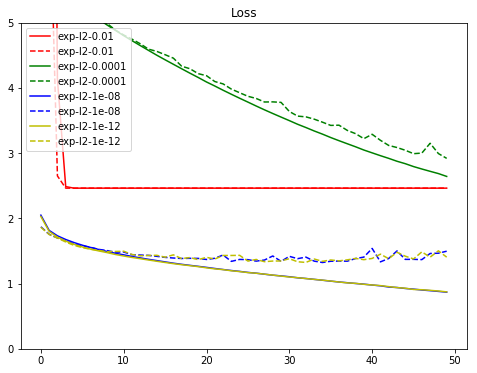

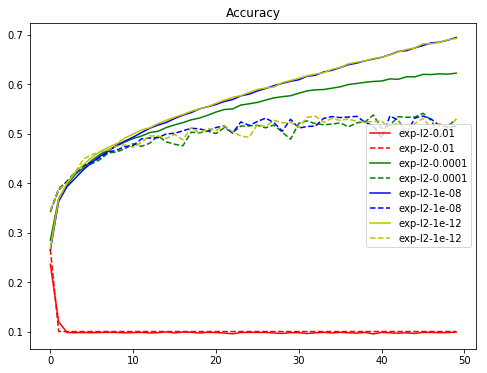

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
l1_l2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [12]:
results = {}
"""Code Here ccc 
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in l1_l2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1_l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0719 20:54:37.562131 12460 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0719 20:54:37.575130 12460 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 20:54:40.900431 12460 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 20:54:40.904410 12460 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v

Experiment with Regulizer = 0.010000


W0719 20:54:41.120832 12460 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0719 20:54:41.592956 12460 deprecation.py:323] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 48s 956us/step - loss: 197.6666 - acc: 0.2078 - val_loss: 35.9235 - val_acc: 0.2102
Epoch 2/50
50000/50000 [==============================] - 11s 223us/step - loss: 15.9256 - acc: 0.1097 - val_loss: 5.1381 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 12s 240us/step - loss: 3.2120 - acc: 0.1000 - val_loss: 2.4716 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.4631 - acc: 0.0982 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.4624 - acc: 0.0967 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.4624 - acc: 0.0982 - val_loss: 2.4622 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 14s 278us/step - loss: 2.4623 - acc: 0.0964 - val_loss

50000/50000 [==============================] - 10s 201us/step - loss: 18.8120 - acc: 0.2698 - val_loss: 17.3541 - val_acc: 0.3445
Epoch 2/50
50000/50000 [==============================] - 10s 190us/step - loss: 16.1386 - acc: 0.3629 - val_loss: 14.9714 - val_acc: 0.3750
Epoch 3/50
50000/50000 [==============================] - 9s 189us/step - loss: 13.9513 - acc: 0.3861 - val_loss: 12.9718 - val_acc: 0.3956
Epoch 4/50
50000/50000 [==============================] - 10s 193us/step - loss: 12.1044 - acc: 0.3981 - val_loss: 11.2683 - val_acc: 0.4041
Epoch 5/50
50000/50000 [==============================] - 10s 195us/step - loss: 10.5327 - acc: 0.4060 - val_loss: 9.8201 - val_acc: 0.4175
Epoch 6/50
50000/50000 [==============================] - 10s 195us/step - loss: 9.1943 - acc: 0.4150 - val_loss: 8.5953 - val_acc: 0.4096
Epoch 7/50
50000/50000 [==============================] - 9s 188us/step - loss: 8.0562 - acc: 0.4200 - val_loss: 7.5634 - val_acc: 0.4135
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 12s 234us/step - loss: 15.0852 - acc: 0.2697 - val_loss: 13.9514 - val_acc: 0.3419
Epoch 2/50
50000/50000 [==============================] - 10s 199us/step - loss: 13.0215 - acc: 0.3546 - val_loss: 12.1333 - val_acc: 0.3694
Epoch 3/50
50000/50000 [==============================] - 11s 227us/step - loss: 11.3474 - acc: 0.3801 - val_loss: 10.5969 - val_acc: 0.3856
Epoch 4/50
50000/50000 [==============================] - 10s 200us/step - loss: 9.9350 - acc: 0.3939 - val_loss: 9.3017 - val_acc: 0.3939
Epoch 5/50
50000/50000 [==============================] - 9s 190us/step - loss: 8.7349 - acc: 0.4041 - val_loss: 8.1927 - val_acc: 0.4103
Epoch 6/50
50000/50000 [==============================] - 9s 188us/step - loss: 7.7133 - acc: 0.4114 - val_loss: 7.2529 - val_acc: 0.4128
Epoch 7/50
50000/50000 [==============================] - 10s 192us/step - loss: 6.8411 - acc: 0.4209 - val_loss: 6.4444 - val_acc: 0.4192
Epoch 8/50
50000/50000 [==========

Epoch 2/50
50000/50000 [==============================] - 9s 189us/step - loss: 13.0011 - acc: 0.3605 - val_loss: 12.1115 - val_acc: 0.3718
Epoch 3/50
50000/50000 [==============================] - 9s 190us/step - loss: 11.3344 - acc: 0.3808 - val_loss: 10.5832 - val_acc: 0.3899
Epoch 4/50
50000/50000 [==============================] - 10s 194us/step - loss: 9.9233 - acc: 0.3974 - val_loss: 9.2904 - val_acc: 0.3947
Epoch 5/50
50000/50000 [==============================] - 10s 200us/step - loss: 8.7243 - acc: 0.4079 - val_loss: 8.1800 - val_acc: 0.4116
Epoch 6/50
50000/50000 [==============================] - 10s 208us/step - loss: 7.7023 - acc: 0.4140 - val_loss: 7.2397 - val_acc: 0.4144
Epoch 7/50
50000/50000 [==============================] - 11s 214us/step - loss: 6.8306 - acc: 0.4218 - val_loss: 6.4405 - val_acc: 0.4203
Epoch 8/50
50000/50000 [==============================] - 10s 198us/step - loss: 6.0873 - acc: 0.4282 - val_loss: 5.7549 - val_acc: 0.4238
Epoch 9/50
50000/50000 [=

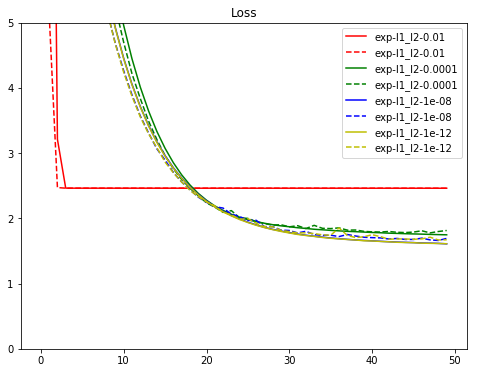

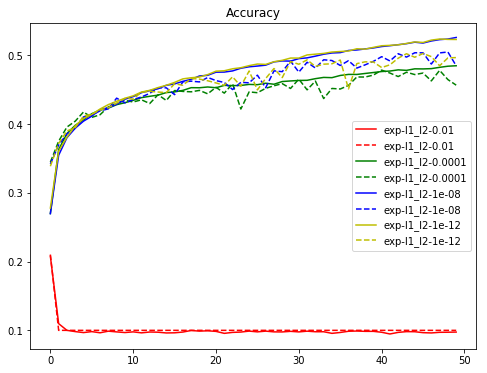

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()